# Using the Emotion AI models we built

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


from tensorflow.keras.models import model_from_json


## Importing model and its weights

In [2]:
with open("Dataset/keyFacialPoints.json","r") as jsonFile:
    savedModel = jsonFile.read()
keyFacialPoints_model = model_from_json(savedModel)
keyFacialPoints_model.load_weights("Dataset/keyFacialPoints_weights.hdf5")

with open("Dataset/facialExpressions.json","r") as jsonFile:
    savedModel = jsonFile.read()
facialExpressions_model = model_from_json(savedModel)
facialExpressions_model.load_weights("Dataset/facialExpressions_weights.hdf5")

In [3]:
import cv2

In [4]:
images = list()

img = cv2.imread(r"C:\Users\Parth Sanghani\OneDrive\Desktop\p2.jpeg", 0)
img = cv2.resize(src=img, dsize=(96, 96), interpolation = cv2.INTER_CUBIC)
img = img / 255

images.append(img)

In [5]:
image_ip = np.empty((len(images), 96, 96, 1))

In [6]:
for i in range(len(images)):
    image_ip[i,] = np.expand_dims(images[i], axis = 2)

In [7]:
keyFacialPoints = keyFacialPoints_model.predict(image_ip)
expression =np.argmax(facialExpressions_model, axis = -1)

In [8]:
type(keyFacialPoints)
keyFacialPoints

array([[31.67996 , 36.573612, 61.854706, 39.291363, 37.132774, 37.895103,
        25.97543 , 36.900936, 56.900352, 39.446186, 67.69638 , 40.927364,
        42.280315, 28.831757, 21.093752, 28.925123, 55.297966, 30.570442,
        74.00492 , 34.484604, 47.042023, 59.82109 , 31.237535, 75.12116 ,
        55.69588 , 77.07134 , 44.394367, 74.224045, 43.788383, 80.56426 ]],
      dtype=float32)

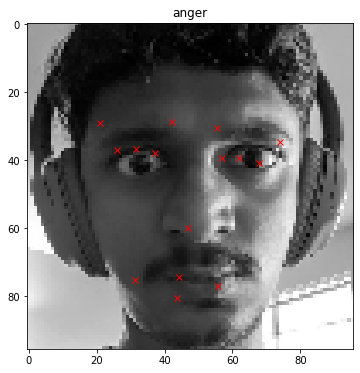

In [14]:
label_to_text = {0:'anger', 1:'disgust', 2:'sad', 3:'happiness', 4: 'surprise'}

plt.figure(figsize = (6, 6))
plt.imshow(image_ip[0],cmap='gray')
plt.title(label_to_text[expression]) #Print Emotion as a title
for i in range(0,30,2): #Print Key Facial Points
        plt.plot(keyFacialPoints[0][i], keyFacialPoints[0][i+1], 'rx')